# Financial Portfolios, Modern Portfolio Theory, and Asset Pricing¶

## Getting the Data

In [1]:
import pandas as pd
import yfinance as yf

In [4]:
stocks = yf.download(['AMZN', 'BA', 'DIS', 'KO', 'WMT'], start = '2017-01-01', end = '2022-08-15')

[*********************100%***********************]  5 of 5 completed


In [5]:
stocks.tail()

Adj Close                                                 \
                  AMZN          BA         DIS         KO         WMT   
Date                                                                    
2022-08-08  139.410004  165.889999  109.110001  62.970001  127.056641   
2022-08-09  137.830002  164.850006  108.129997  63.049999  128.311172   
2022-08-10  142.690002  169.020004  112.430000  63.650002  128.580002   
2022-08-11  140.639999  167.880005  117.690002  63.220001  129.820007   
2022-08-12  143.550003  169.990005  121.570000  63.700001  132.220001   

                 Close                                                 ...  \
                  AMZN          BA         DIS         KO         WMT  ...   
Date                                                                   ...   
2022-08-08  139.410004  165.889999  109.110001  62.970001  127.610001  ...   
2022-08-09  137.830002  164.850006  108.129997  63.049999  128.869995  ...   
2022-08-10  142.690002  169.020004  112.430000  63.650002  129.139999  ...   
2022-08-11  140.639999  167.880005  117.690002  63.220001  129.820007  ...   
2022-08-12  143.550003  169.990005  121.570000  63.700001  132.220001  ...   

                  Open                                                 \
                  AMZN          BA         DIS         KO         WMT   
Date                                                                    
2022-08-08  142.050003  166.410004  108.209999  63.500000  126.650002   
2022-08-09  138.050003  166.509995  109.220001  63.180000  127.889999   
2022-08-10  142.899994  168.350006  112.480003  63.630001  130.000000   
2022-08-11  143.860001  170.500000  122.209999  63.689999  129.699997   
2022-08-12  142.050003  168.389999  119.000000  63.430000  130.000000   

              Volume                                        
                AMZN        BA       DIS       KO      WMT  
Date                                                        
2022-08-08  52229000  11293200  13025900  9165200  6058400  
2022-08-09  40434700   6064800   8776500  7910900  6441700  
2022-08-10  54773800   7181700  26398700  8857300  8417000  
2022-08-11  44867300   4996800  50375000  8507800  7951500  
2022-08-12  47582800   4335900  21946800  9483700  8870300  

[5 rows x 30 columns]

In [7]:
stocks.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-08', '2022-08-09', '2022-08-10',
               '2022-08-11', '2022-08-12'],
              dtype='datetime64[ns]', name='Date', length=1413, freq=None)

In [8]:
stocks = stocks['Adj Close'].copy()

In [9]:
stocks.head()

,AMZN,BA,DIS,KO,WMT
Date,,,,,
2017-01-03,37.683498,145.533676,101.584366,34.991787,61.311607
2017-01-04,37.859001,147.063461,102.886734,34.866219,61.668785
2017-01-05,39.022499,147.146912,102.829269,34.949928,61.802731
2017-01-06,39.799500,147.508499,104.361458,34.941566,60.954411
2017-01-09,39.846001,146.785324,103.767731,34.589966,61.356236


In [10]:
stocks.to_csv('port_stocks.csv')

# Creating the equal-eighted Portfolio

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format

In [72]:
stocks.head()

,AMZN,BA,DIS,KO,WMT
Date,,,,,
2017-01-03,37.6835,145.5337,101.5844,34.9918,61.3116
2017-01-04,37.8590,147.0635,102.8867,34.8662,61.6688
2017-01-05,39.0225,147.1469,102.8293,34.9499,61.8027
2017-01-06,39.7995,147.5085,104.3615,34.9416,60.9544
2017-01-09,39.8460,146.7853,103.7677,34.5900,61.3562


In [73]:
ret = stocks.pct_change().dropna()

In [74]:
ret.head()

,AMZN,BA,DIS,KO,WMT
Date,,,,,
2017-01-04,0.0047,0.0105,0.0128,-0.0036,0.0058
2017-01-05,0.0307,0.0006,-0.0006,0.0024,0.0022
2017-01-06,0.0199,0.0025,0.0149,-0.0002,-0.0137
2017-01-09,0.0012,-0.0049,-0.0057,-0.0101,0.0066
2017-01-10,-0.0013,0.0047,0.0002,-0.0068,-0.0070


In [75]:
ret.mean(axis=1)

Date
2017-01-04    0.0060
2017-01-05    0.0071
2017-01-06    0.0047
2017-01-09   -0.0026
2017-01-10   -0.0020
               ...  
2022-08-08    0.0040
2022-08-09   -0.0031
2022-08-10    0.0224
2022-08-11    0.0057
2022-08-12    0.0185
Length: 1412, dtype: float64

In [76]:
no_assets = len(stocks.columns)
no_assets

5

In [77]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.2, 0.2, 0.2, 0.2, 0.2]

In [78]:
ret.mul(weights, axis = 'columns').sum(axis=1)

Date
2017-01-04    0.0060
2017-01-05    0.0071
2017-01-06    0.0047
2017-01-09   -0.0026
2017-01-10   -0.0020
               ...  
2022-08-08    0.0040
2022-08-09   -0.0031
2022-08-10    0.0224
2022-08-11    0.0057
2022-08-12    0.0185
Length: 1412, dtype: float64

In [79]:
ret.dot(weights)

Date
2017-01-04    0.0060
2017-01-05    0.0071
2017-01-06    0.0047
2017-01-09   -0.0026
2017-01-10   -0.0020
               ...  
2022-08-08    0.0040
2022-08-09   -0.0031
2022-08-10    0.0224
2022-08-11    0.0057
2022-08-12    0.0185
Length: 1412, dtype: float64

In [80]:
ret['EWP'] = ret.dot(weights)

In [81]:
ret.head()

,AMZN,BA,DIS,KO,WMT,EWP
Date,,,,,,
2017-01-04,0.0047,0.0105,0.0128,-0.0036,0.0058,0.0060
2017-01-05,0.0307,0.0006,-0.0006,0.0024,0.0022,0.0071
2017-01-06,0.0199,0.0025,0.0149,-0.0002,-0.0137,0.0047
2017-01-09,0.0012,-0.0049,-0.0057,-0.0101,0.0066,-0.0026
2017-01-10,-0.0013,0.0047,0.0002,-0.0068,-0.0070,-0.0020


In [82]:
summary = ret.agg(['mean','std']).T

In [83]:
summary

,mean,std
AMZN,0.0012,0.0207
BA,0.0006,0.0298
DIS,0.0003,0.0187
KO,0.0005,0.0127
WMT,0.0006,0.0143
EWP,0.0006,0.0135


In [84]:
summary.columns = ['Return','Risk']

In [85]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)

In [86]:
summary

,Return,Risk
AMZN,0.2926,0.3281
BA,0.1398,0.4733
DIS,0.0756,0.2963
KO,0.1274,0.2016
WMT,0.1629,0.2269
EWP,0.1596,0.2135


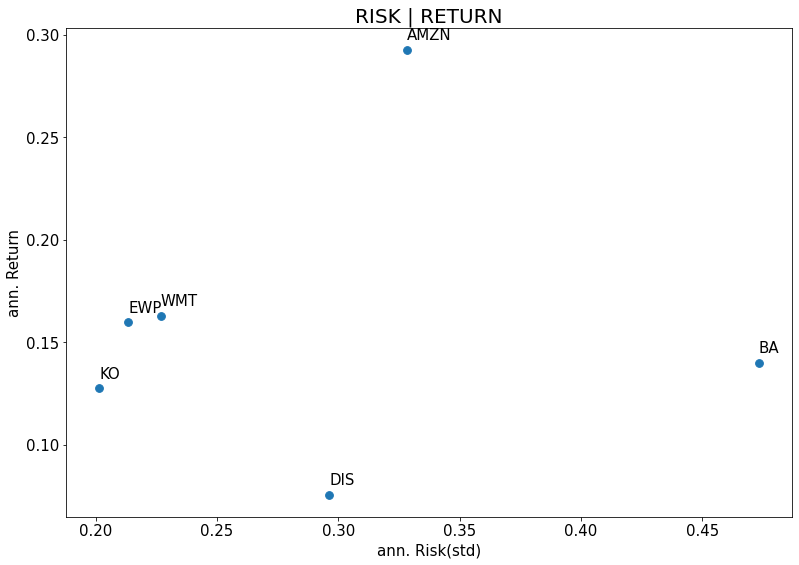

In [92]:
summary.plot(kind='scatter', x='Risk', y='Return', figsize=(13,9), s=60, fontsize=15)
for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i, 'Risk'], summary.loc[i,'Return']+0.005), size=15);
plt.xlabel('ann. Risk(std)', fontsize=15)
plt.ylabel('ann. Return', fontsize=15)
plt.title('RISK | RETURN', fontsize=20);

In [93]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(['mean','std']).T
    summary.columns = ['Return', 'Risk']
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [97]:
ann_risk_return(ret)

,Return,Risk
AMZN,0.2926,0.3281
BA,0.1398,0.4733
DIS,0.0756,0.2963
KO,0.1274,0.2016
WMT,0.1629,0.2269
EWP,0.1596,0.2135


# Creating many Random Portfolios

In [129]:
ret = stocks.pct_change().dropna()

In [130]:
ret.head()

,AMZN,BA,DIS,KO,WMT
Date,,,,,
2017-01-04,0.0047,0.0105,0.0128,-0.0036,0.0058
2017-01-05,0.0307,0.0006,-0.0006,0.0024,0.0022
2017-01-06,0.0199,0.0025,0.0149,-0.0002,-0.0137
2017-01-09,0.0012,-0.0049,-0.0057,-0.0101,0.0066
2017-01-10,-0.0013,0.0047,0.0002,-0.0068,-0.0070


In [131]:
summary = ann_risk_return(ret)

In [132]:
summary

,Return,Risk
AMZN,0.2926,0.3281
BA,0.1398,0.4733
DIS,0.0756,0.2963
KO,0.1274,0.2016
WMT,0.1629,0.2269


In [133]:
noa = len(stocks.columns)
noa

5

In [134]:
nop = 100000
nop

100000

In [135]:
np.random.random(10*5).reshape(10,5)

array([[0.44515708, 0.50524221, 0.49632282, 0.4943696 , 0.6686739 ],
       [0.39256944, 0.03641638, 0.10600647, 0.07695194, 0.24222651],
       [0.8792073 , 0.70982781, 0.52942685, 0.5417104 , 0.47891736],
       [0.33374879, 0.84568316, 0.03677627, 0.79922136, 0.82850908],
       [0.53604255, 0.93356055, 0.03127399, 0.79570086, 0.02543641],
       [0.23057812, 0.8959745 , 0.84838051, 0.17836867, 0.74725074],
       [0.71028789, 0.61594338, 0.12502155, 0.3594606 , 0.42259277],
       [0.83392258, 0.77668069, 0.9299935 , 0.56547294, 0.7445677 ],
       [0.4084081 , 0.60589339, 0.14356804, 0.47958099, 0.43738939],
       [0.63193104, 0.26636657, 0.25961801, 0.95763199, 0.68504115]])

In [136]:
np.random.seed(123)

In [137]:
matrix = np.random.random(noa*nop).reshape(nop,noa)
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897],
       [0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752],
       [0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426],
       ...,
       [0.29637781, 0.99576832, 0.43176126, 0.87734014, 0.75144246],
       [0.47854994, 0.19749959, 0.07957797, 0.48064235, 0.53895995],
       [0.81115823, 0.10097173, 0.60449575, 0.96278719, 0.58875411]])

In [138]:
matrix.sum(axis = 1, keepdims = True)

array([[2.48024371],
       [2.96174982],
       [1.96852212],
       ...,
       [3.35269   ],
       [1.77522981],
       [3.068167  ]])

In [139]:
weights = matrix / matrix.sum(axis=1, keepdims=True)

In [140]:
weights

array([[0.28080675, 0.11536743, 0.09146337, 0.2222825 , 0.29007995],
       [0.14285692, 0.3311435 , 0.23122471, 0.162381  , 0.13239387],
       [0.17433282, 0.37035383, 0.22279264, 0.03031609, 0.20220461],
       ...,
       [0.0884    , 0.29700578, 0.12878055, 0.26168245, 0.22413121],
       [0.2695707 , 0.11125297, 0.04482686, 0.27074937, 0.3036001 ],
       [0.26437877, 0.03290946, 0.19702179, 0.31379882, 0.19189115]])

In [142]:
weights.sum(axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [143]:
ret.head()

,AMZN,BA,DIS,KO,WMT
Date,,,,,
2017-01-04,0.0047,0.0105,0.0128,-0.0036,0.0058
2017-01-05,0.0307,0.0006,-0.0006,0.0024,0.0022
2017-01-06,0.0199,0.0025,0.0149,-0.0002,-0.0137
2017-01-09,0.0012,-0.0049,-0.0057,-0.0101,0.0066
2017-01-10,-0.0013,0.0047,0.0002,-0.0068,-0.0070


In [147]:
weights.T

array([[0.28080675, 0.14285692, 0.17433282, ..., 0.0884    , 0.2695707 ,
        0.26437877],
       [0.11536743, 0.3311435 , 0.37035383, ..., 0.29700578, 0.11125297,
        0.03290946],
       [0.09146337, 0.23122471, 0.22279264, ..., 0.12878055, 0.04482686,
        0.19702179],
       [0.2222825 , 0.162381  , 0.03031609, ..., 0.26168245, 0.27074937,
        0.31379882],
       [0.29007995, 0.13239387, 0.20220461, ..., 0.22413121, 0.3036001 ,
        0.19189115]])

In [151]:
port_ret = ret.dot(weights.T)
port_ret

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,0.0046,0.0073,0.0086,0.0041,0.0065,0.0059,0.0060,0.0055,0.0050,0.0072,...,0.0084,0.0051,0.0076,0.0023,0.0046,0.0065,0.0064,0.0056,0.0038,0.0041
2017-01-05,0.0098,0.0051,0.0060,0.0116,0.0064,0.0066,0.0026,0.0041,0.0094,0.0035,...,0.0077,0.0102,0.0089,0.0038,0.0092,0.0015,0.0078,0.0039,0.0096,0.0092
2017-01-06,0.0032,0.0052,0.0049,0.0048,0.0044,0.0011,0.0018,0.0044,0.0023,0.0043,...,0.0075,0.0092,0.0106,0.0014,0.0099,0.0029,0.0072,0.0013,0.0021,0.0056
2017-01-09,-0.0011,-0.0035,-0.0019,-0.0013,-0.0025,-0.0008,-0.0035,-0.0042,-0.0000,-0.0031,...,-0.0015,-0.0044,-0.0032,-0.0050,-0.0051,-0.0045,-0.0032,-0.0032,-0.0012,-0.0029
2017-01-10,-0.0033,-0.0006,-0.0000,-0.0034,-0.0016,-0.0028,-0.0023,-0.0026,-0.0039,-0.0020,...,-0.0012,-0.0014,-0.0012,-0.0047,-0.0024,-0.0017,-0.0017,-0.0020,-0.0038,-0.0036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,0.0009,0.0057,0.0068,-0.0006,0.0048,0.0039,0.0062,0.0058,0.0026,0.0086,...,0.0083,0.0007,0.0069,0.0020,0.0024,0.0075,0.0047,0.0038,-0.0003,0.0017
2022-08-09,-0.0016,-0.0043,-0.0043,-0.0024,-0.0031,-0.0007,-0.0015,-0.0026,-0.0007,-0.0028,...,-0.0047,-0.0059,-0.0064,-0.0001,-0.0057,-0.0024,-0.0046,-0.0015,-0.0008,-0.0027
2022-08-10,0.0192,0.0244,0.0251,0.0203,0.0226,0.0184,0.0197,0.0219,0.0185,0.0233,...,0.0273,0.0262,0.0299,0.0159,0.0266,0.0215,0.0253,0.0187,0.0173,0.0214


In [152]:
port_summary = ann_risk_return(port_ret)

In [153]:
port_summary.head()

,Return,Risk
0,0.1808,0.1941
1,0.1478,0.2513
2,0.1564,0.2628
3,0.1894,0.1956
4,0.1566,0.2226


In [156]:
summary

,Return,Risk
AMZN,0.2926,0.3281
BA,0.1398,0.4733
DIS,0.0756,0.2963
KO,0.1274,0.2016
WMT,0.1629,0.2269


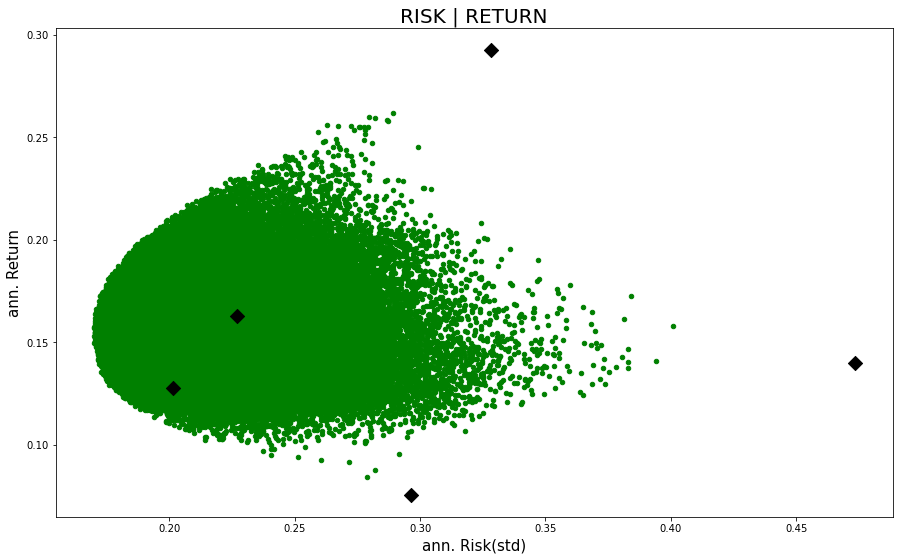

In [161]:
plt.figure(figsize=(15,9))
plt.scatter(port_summary.loc[:,'Risk'], port_summary.loc[:,'Return'], s=20,color='green')
plt.scatter(summary.loc[:,'Risk'], summary.loc[:,'Return'], s=100, color='black', marker='D')
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("RISK | RETURN", fontsize = 20)
plt.show()

# Calculate the Sharpe Ratio and a Risk Free Asset

\begin{equation}
                SharpRatio = \frac{PortfolioReturn - RFR}{PortfolioRisk}
\end{equation}

In [164]:
risk_free_return = 0.0204
risk_free_risk = 0

In [166]:
rf= [risk_free_return, risk_free_risk]
rf

[0.0204, 0]

# Portfolio Analysis with the Sharpe Ratio

In [173]:
summary

,Return,Risk,Sharpe
AMZN,0.2926,0.3281,0.8295
BA,0.1398,0.4733,0.2522
DIS,0.0756,0.2963,0.1863
KO,0.1274,0.2016,0.5308
WMT,0.1629,0.2269,0.6280


In [174]:
port_summary.head()

,Return,Risk
0,0.1808,0.1941
1,0.1478,0.2513
2,0.1564,0.2628
3,0.1894,0.1956
4,0.1566,0.2226


In [177]:
port_summary['Sharpe'] = (port_summary['Return'].sub(rf[0])) / port_summary['Risk']

In [178]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1808,0.1941,0.8262
1,0.1478,0.2513,0.5070
2,0.1564,0.2628,0.5175
3,0.1894,0.1956,0.8640
4,0.1566,0.2226,0.6119


In [179]:
port_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Return  100000 non-null  float64
 1   Risk    100000 non-null  float64
 2   Sharpe  100000 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [180]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1597,0.2223,0.6354
std,0.0205,0.0266,0.1182
min,0.0840,0.1698,0.2283
25%,0.1449,0.2028,0.5526
50%,0.1596,0.2192,0.6355
75%,0.1732,0.2378,0.7172
max,0.2618,0.4009,0.9507


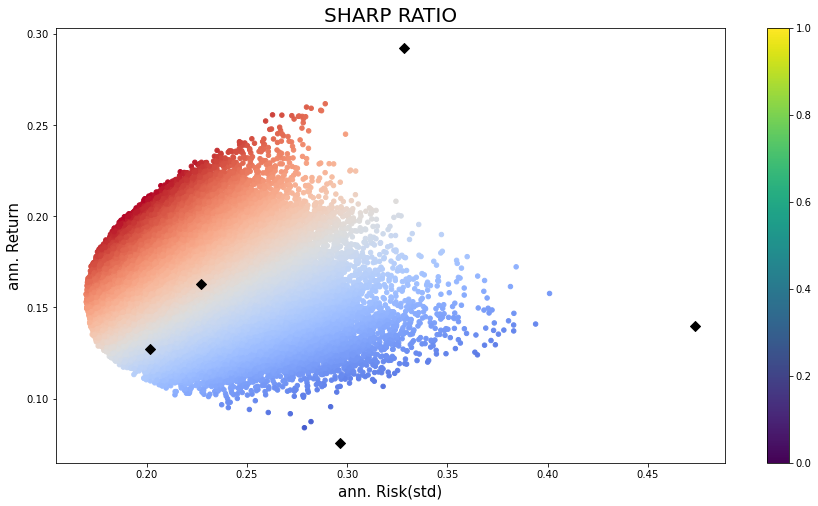

In [187]:
plt.figure(figsize=(15,8))
plt.scatter(port_summary.loc[:,'Risk'], port_summary.loc[:,'Return'], s=20
           ,c = port_summary.loc[:,'Sharpe'], cmap='coolwarm', vmin=0.2, vmax=0.95)
plt.scatter(summary.loc[:,'Risk'], summary.loc[:,'Return'], s=50, marker='D', c='black')
plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("SHARP RATIO", fontsize = 20);

# Finding the optimal Portfolio

In [188]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1808,0.1941,0.8262
1,0.1478,0.2513,0.5070
2,0.1564,0.2628,0.5175
3,0.1894,0.1956,0.8640
4,0.1566,0.2226,0.6119


In [189]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1597,0.2223,0.6354
std,0.0205,0.0266,0.1182
min,0.0840,0.1698,0.2283
25%,0.1449,0.2028,0.5526
50%,0.1596,0.2192,0.6355
75%,0.1732,0.2378,0.7172
max,0.2618,0.4009,0.9507


In [190]:
weights

array([[0.28080675, 0.11536743, 0.09146337, 0.2222825 , 0.29007995],
       [0.14285692, 0.3311435 , 0.23122471, 0.162381  , 0.13239387],
       [0.17433282, 0.37035383, 0.22279264, 0.03031609, 0.20220461],
       ...,
       [0.0884    , 0.29700578, 0.12878055, 0.26168245, 0.22413121],
       [0.2695707 , 0.11125297, 0.04482686, 0.27074937, 0.3036001 ],
       [0.26437877, 0.03290946, 0.19702179, 0.31379882, 0.19189115]])

In [192]:
msrp = port_summary.Sharpe.idxmax()
msrp

80060

In [194]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.2097
Risk     0.1991
Sharpe   0.9507
Name: 80060, dtype: float64

In [198]:
msrp_w = weights[msrp]
msrp_w

array([0.43105493, 0.0034168 , 0.01274271, 0.22222412, 0.33056143])

In [211]:
opt_weights = pd.Series(index = stocks.columns, data=msrp_w)
opt_weights

AMZN   0.4311
BA     0.0034
DIS    0.0127
KO     0.2222
WMT    0.3306
dtype: float64

In [214]:
ret['MP'] = ret.dot(opt_weights)

In [215]:
ret.head()

,AMZN,BA,DIS,KO,WMT,MP
Date,,,,,,
2017-01-04,0.0047,0.0105,0.0128,-0.0036,0.0058,0.0033
2017-01-05,0.0307,0.0006,-0.0006,0.0024,0.0022,0.0145
2017-01-06,0.0199,0.0025,0.0149,-0.0002,-0.0137,0.0042
2017-01-09,0.0012,-0.0049,-0.0057,-0.0101,0.0066,0.0004
2017-01-10,-0.0013,0.0047,0.0002,-0.0068,-0.0070,-0.0043


In [217]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AMZN,0.2926,0.3281
BA,0.1398,0.4733
DIS,0.0756,0.2963
KO,0.1274,0.2016
WMT,0.1629,0.2269
MP,0.2097,0.1991


In [218]:
summary['Sharpe'] = (summary['Return'].sub(rf[0])) / summary['Risk']

In [219]:
summary

,Return,Risk,Sharpe
AMZN,0.2926,0.3281,0.8295
BA,0.1398,0.4733,0.2522
DIS,0.0756,0.2963,0.1863
KO,0.1274,0.2016,0.5308
WMT,0.1629,0.2269,0.6280
MP,0.2097,0.1991,0.9507


Text(0.5, 1.0, 'The Max Sharpe Ratio Portfolio')

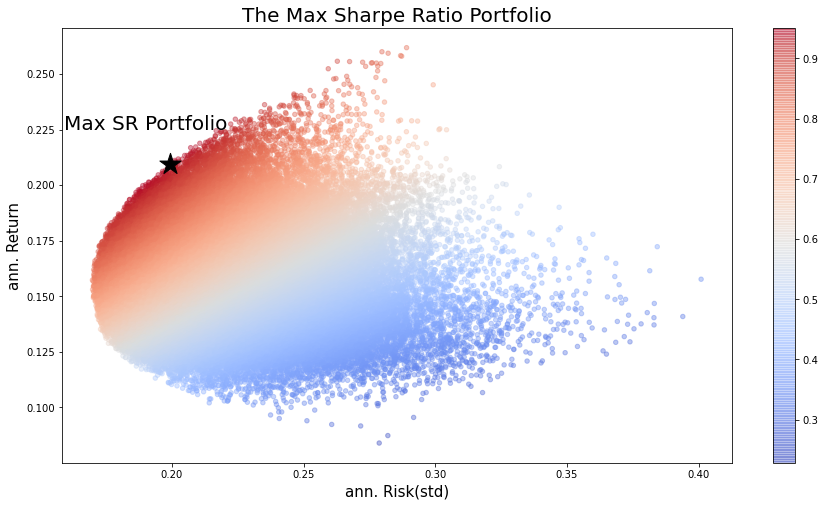

In [233]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:,'Risk'], port_summary.loc[:,'Return'], s= 20, 
            c = port_summary.loc[:,'Sharpe'], cmap='coolwarm', alpha = 0.4)

plt.colorbar()
plt.scatter(summary.loc['MP', 'Risk'], summary.loc['MP','Return'], 
                         s=500, c='black', marker='*')
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.04, summary.loc["MP", "Return"]+0.015), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)

**********************************************************************************************

# The Sharpe Ratio - a graphical intuition (PP)

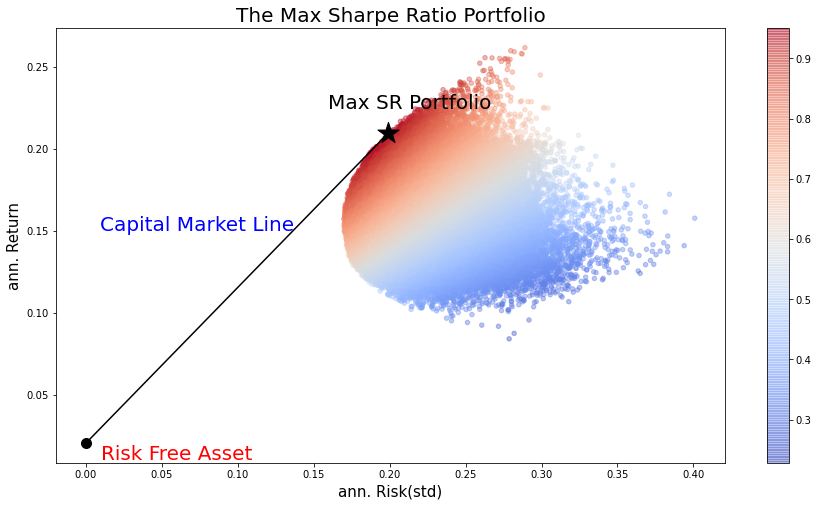

In [249]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:,'Risk'], port_summary.loc[:,'Return'], s= 20, 
            c = port_summary.loc[:,'Sharpe'], cmap='coolwarm', alpha = 0.4)

plt.colorbar()
plt.scatter(summary.loc['MP', 'Risk'], summary.loc['MP','Return'], 
                         s=500, c='black', marker='*')
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.04, summary.loc["MP", "Return"]+0.015), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s=100, marker ='o', c='black')
plt.annotate('Risk Free Asset', xy=(rf[1]+0.01, rf[0]-0.01), size=20, color='red')

plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)

plt.plot([rf[1], summary.loc['MP','Risk']], [rf[0], summary.loc['MP', 'Return']], c='black')
plt.annotate('Capital Market Line', xy=(0.009, 0.15), size=20, color='blue');
#plt.tick_params(axis = 'both', labelsize=15)

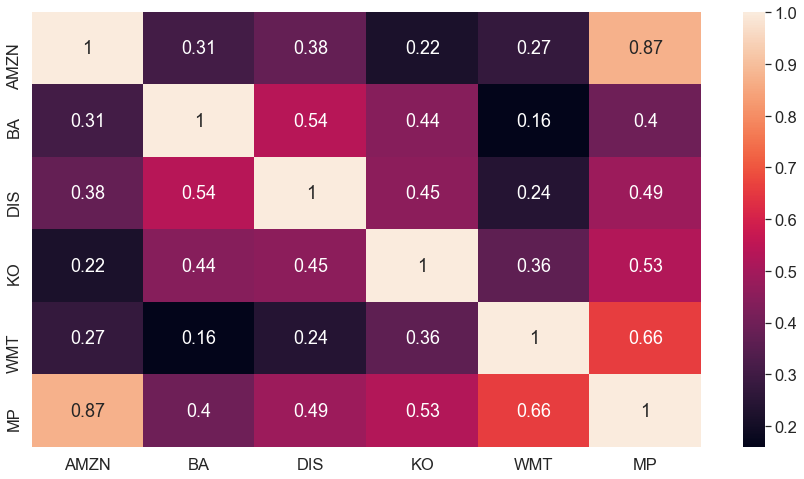

In [257]:
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.5)
sns.heatmap(ret.corr(), annot=True);

# Systematic vs. unsystematic (diversificable) Risk

In [258]:
summary

,Return,Risk,Sharpe
AMZN,0.2926,0.3281,0.8295
BA,0.1398,0.4733,0.2522
DIS,0.0756,0.2963,0.1863
KO,0.1274,0.2016,0.5308
WMT,0.1629,0.2269,0.6280
MP,0.2097,0.1991,0.9507


In [259]:
summary['TotalRisk_var'] = np.power(summary.Risk, 2)

In [260]:
summary

,Return,Risk,Sharpe,TotalRisk_var
AMZN,0.2926,0.3281,0.8295,0.1077
BA,0.1398,0.4733,0.2522,0.2240
DIS,0.0756,0.2963,0.1863,0.0878
KO,0.1274,0.2016,0.5308,0.0406
WMT,0.1629,0.2269,0.6280,0.0515
MP,0.2097,0.1991,0.9507,0.0396


In [261]:
ret.head()

,AMZN,BA,DIS,KO,WMT,MP
Date,,,,,,
2017-01-04,0.0047,0.0105,0.0128,-0.0036,0.0058,0.0033
2017-01-05,0.0307,0.0006,-0.0006,0.0024,0.0022,0.0145
2017-01-06,0.0199,0.0025,0.0149,-0.0002,-0.0137,0.0042
2017-01-09,0.0012,-0.0049,-0.0057,-0.0101,0.0066,0.0004
2017-01-10,-0.0013,0.0047,0.0002,-0.0068,-0.0070,-0.0043


In [262]:
COV = ret.cov()*252

In [263]:
COV

,AMZN,BA,DIS,KO,WMT,MP
AMZN,0.1077,0.0477,0.0367,0.0145,0.0205,0.0570
BA,0.0477,0.2240,0.0754,0.0422,0.0170,0.0373
DIS,0.0367,0.0754,0.0878,0.0272,0.0164,0.0286
KO,0.0145,0.0422,0.0272,0.0406,0.0166,0.0213
WMT,0.0205,0.0170,0.0164,0.0166,0.0515,0.0298
MP,0.0570,0.0373,0.0286,0.0213,0.0298,0.0396


In [264]:
opt_weights

AMZN   0.4311
BA     0.0034
DIS    0.0127
KO     0.2222
WMT    0.3306
dtype: float64

In [268]:
COV.iloc[:-1,-1]

AMZN   0.0570
BA     0.0373
DIS    0.0286
KO     0.0213
WMT    0.0298
Name: MP, dtype: float64

In [265]:
COV.iloc[:-1,-1].dot(opt_weights)

0.03964503686404087

In [267]:
COV.iloc[-1,-1]

0.039645036864040875

In [269]:
summary['SystRisk_var'] = COV.iloc[:,-1]
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var
AMZN,0.2926,0.3281,0.8295,0.1077,0.0570
BA,0.1398,0.4733,0.2522,0.2240,0.0373
DIS,0.0756,0.2963,0.1863,0.0878,0.0286
KO,0.1274,0.2016,0.5308,0.0406,0.0213
WMT,0.1629,0.2269,0.6280,0.0515,0.0298
MP,0.2097,0.1991,0.9507,0.0396,0.0396


In [270]:
summary['UnsystRisk_var'] = summary['TotalRisk_var'].sub(summary['SystRisk_var'])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.2926,0.3281,0.8295,0.1077,0.0570,0.0506
BA,0.1398,0.4733,0.2522,0.2240,0.0373,0.1867
DIS,0.0756,0.2963,0.1863,0.0878,0.0286,0.0592
KO,0.1274,0.2016,0.5308,0.0406,0.0213,0.0194
WMT,0.1629,0.2269,0.6280,0.0515,0.0298,0.0217
MP,0.2097,0.1991,0.9507,0.0396,0.0396,0.0000


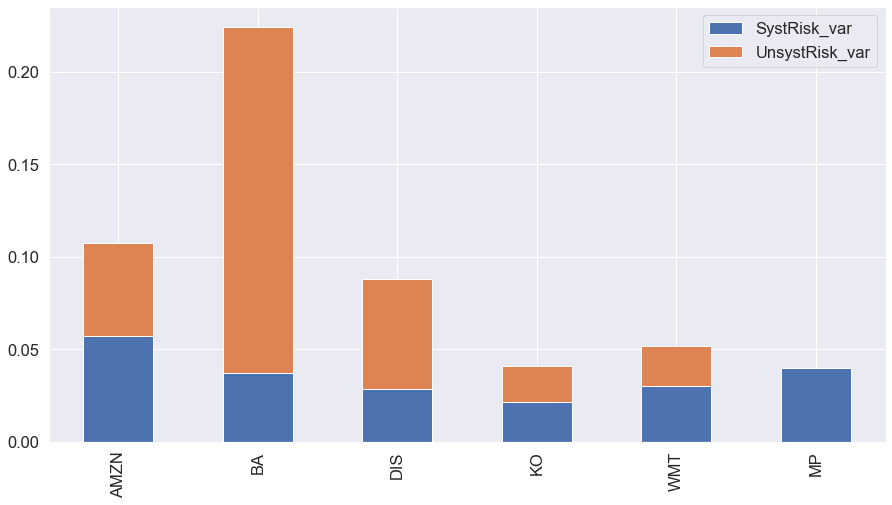

In [272]:
summary.iloc[:,4:].plot(kind='bar', stacked=True, figsize=(15,8));

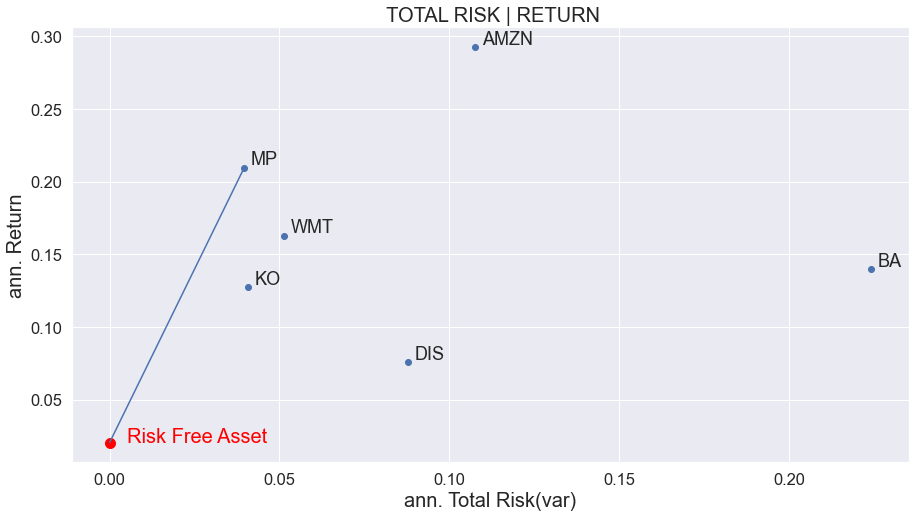

In [283]:
plt.figure(figsize=(15,8))
plt.scatter(summary.TotalRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, 'TotalRisk_var']+0.002, summary.loc[i, 'Return']+0.002))
plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.005, rf[0]), size = 20, color = "red")
plt.xlabel("ann. Total Risk(var)", fontsize = 20)
plt.ylabel("ann. Return", fontsize = 20)
plt.title(" TOTAL RISK | RETURN", fontsize = 20)
plt.show()

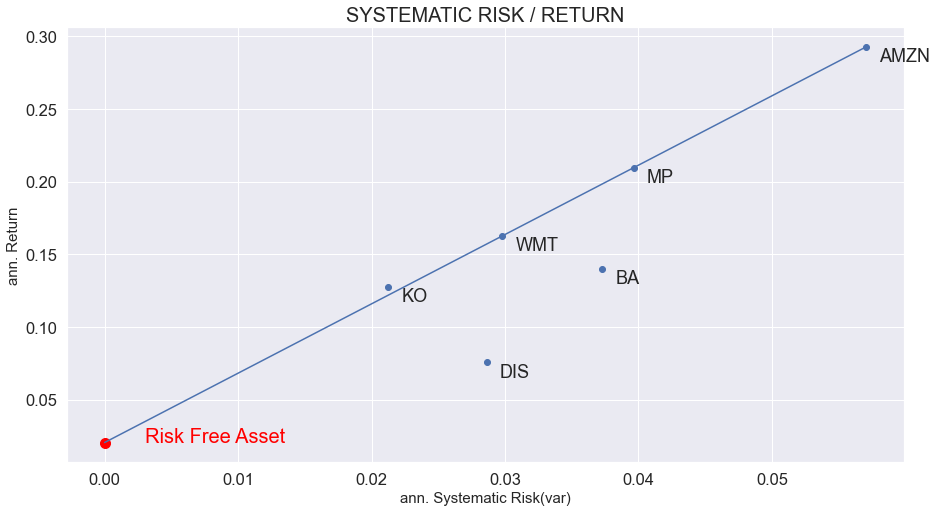

In [291]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.SystRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, 
                        summary.loc[i, "Return"]-0.01))
    
plt.plot([rf[1], summary.loc["AMZN", "SystRisk_var"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.003, rf[0]), size = 20, color = "red")  
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("SYSTEMATIC RISK / RETURN", fontsize = 20)
plt.show()

# CAPM AND THE SECURITY MARKET LINE

In [292]:
pd.options.display.float_format = '{:.2f}'.format

In [293]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.29,0.33,0.83,0.11,0.06,0.05
BA,0.14,0.47,0.25,0.22,0.04,0.19
DIS,0.08,0.30,0.19,0.09,0.03,0.06
KO,0.13,0.20,0.53,0.04,0.02,0.02
WMT,0.16,0.23,0.63,0.05,0.03,0.02
MP,0.21,0.20,0.95,0.04,0.04,0.00


In [294]:
summary.SystRisk_var / summary.loc['MP', 'SystRisk_var']

AMZN   1.44
BA     0.94
DIS    0.72
KO     0.54
WMT    0.75
MP     1.00
Name: SystRisk_var, dtype: float64

In [295]:
summary['beta'] = summary.SystRisk_var / summary.loc['MP', 'SystRisk_var']

In [296]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AMZN,0.29,0.33,0.83,0.11,0.06,0.05,1.44
BA,0.14,0.47,0.25,0.22,0.04,0.19,0.94
DIS,0.08,0.30,0.19,0.09,0.03,0.06,0.72
KO,0.13,0.20,0.53,0.04,0.02,0.02,0.54
WMT,0.16,0.23,0.63,0.05,0.03,0.02,0.75
MP,0.21,0.20,0.95,0.04,0.04,0.00,1.00


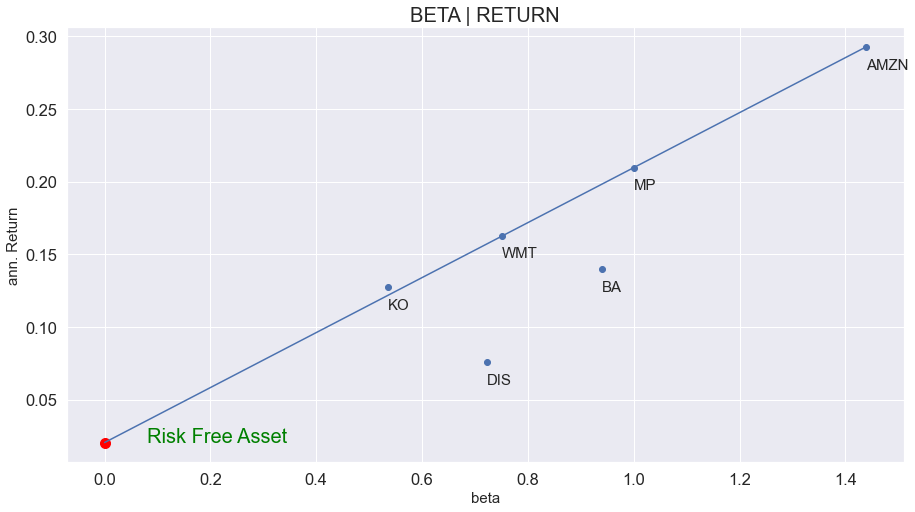

In [305]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.08, rf[0]), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("BETA | RETURN", fontsize = 20)
plt.show()

In [310]:
summary['capm_ret'] = rf[0] + (summary.loc['MP', 'Return'] - rf[0]) * summary.beta

In [311]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,camp_ret,capm_ret
AMZN,0.29,0.33,0.83,0.11,0.06,0.05,1.44,0.29,0.29
BA,0.14,0.47,0.25,0.22,0.04,0.19,0.94,0.20,0.20
DIS,0.08,0.30,0.19,0.09,0.03,0.06,0.72,0.16,0.16
KO,0.13,0.20,0.53,0.04,0.02,0.02,0.54,0.12,0.12
WMT,0.16,0.23,0.63,0.05,0.03,0.02,0.75,0.16,0.16
MP,0.21,0.20,0.95,0.04,0.04,0.00,1.00,0.21,0.21


# BETA AND ALPHA

In [312]:
summary['alpha'] = summary.Return - summary.capm_ret

In [313]:
ret.head()

,AMZN,BA,DIS,KO,WMT,MP
Date,,,,,,
2017-01-04,0.00,0.01,0.01,-0.00,0.01,0.00
2017-01-05,0.03,0.00,-0.00,0.00,0.00,0.01
2017-01-06,0.02,0.00,0.01,-0.00,-0.01,0.00
2017-01-09,0.00,-0.00,-0.01,-0.01,0.01,0.00
2017-01-10,-0.00,0.00,0.00,-0.01,-0.01,-0.00


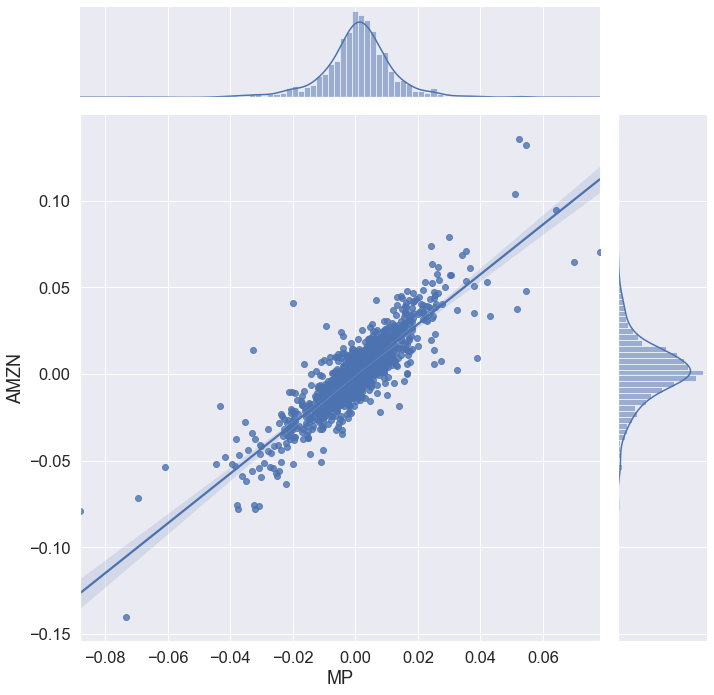

In [317]:
sns.set(font_scale=1.5)
sns.jointplot(data= ret, x='MP', y='AMZN', height = 10, kind='reg');

In [318]:
np.polyfit(ret.MP, ret.AMZN, 1)

array([ 1.43820103e+00, -3.58384500e-05])

In [320]:
AMZN_beta = np.polyfit(ret.MP, ret.AMZN, 1)[0]
AMZN_beta

1.4382010325392627

In [321]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,camp_ret,capm_ret,alpha
AMZN,0.29,0.33,0.83,0.11,0.06,0.05,1.44,0.29,0.29,-0.00
BA,0.14,0.47,0.25,0.22,0.04,0.19,0.94,0.20,0.20,-0.06
DIS,0.08,0.30,0.19,0.09,0.03,0.06,0.72,0.16,0.16,-0.08
KO,0.13,0.20,0.53,0.04,0.02,0.02,0.54,0.12,0.12,0.01
WMT,0.16,0.23,0.63,0.05,0.03,0.02,0.75,0.16,0.16,0.00
MP,0.21,0.20,0.95,0.04,0.04,0.00,1.00,0.21,0.21,0.00
